# Using IPCC Color Palattes

`pyam` supports the use of explicit IPCC AR5 and AR6 color palattes by providing the RCP and/or SSP of interest via the `pyam.run_control()`.

The full list of supported special colors is

In [1]:
import pyam
import pandas as pd

pd.DataFrame({'name': list(pyam.plotting.PYAM_COLORS.keys()), 
              'color': list(pyam.plotting.PYAM_COLORS.values())})

<IPython.core.display.Javascript object>

,name,color
0,AR6-SSP1-1.9,#00AAD0
1,AR6-SSP1-2.6,#003466
2,AR6-SSP2-4.5,#EF550F
3,AR6-SSP3-7.0,#E00000
4,AR6-SSP3-LowNTCF,#E00000
5,AR6-SSP4-3.4,#FFA900
6,AR6-SSP4-6.0,#C47900
7,AR6-SSP5-3.4-OS,#7F006E
8,AR6-SSP5-8.5,#990002
9,AR6-RCP-2.6,#003466


Let's pull out a few example scenarios from our tutorial dataset and plot them with defaults

INFO:root:Reading `tutorial_AR5_data.csv`


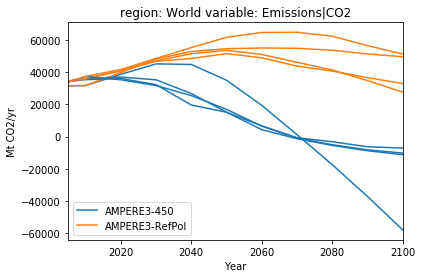

In [2]:
scenarios = ['AMPERE3-450', 'AMPERE3-RefPol']

df = (
    pyam.IamDataFrame(data='tutorial_AR5_data.csv', encoding='utf-8')
    .filter(variable='Emissions|CO2', region='World', scenario=scenarios)
)

df.line_plot(color='scenario')

As an example, let us say that each of these two scenario families correspond to scenarios in the AR6 context. We can utilize the specific colors by following two steps:

1. Update `pyam.run_control()` telling it which metadata maps to which AR6 scenario color
2. Call `line_plot` using that meta data

### Updating the run control

We need to tell `pyam` that whenever it sees a certain `ar6-type`, it should use a specific color. We do this here in code, but it also works by specifying the mapping in a `yaml`  config file.

In [3]:
color_map = {
    'AMPERE3-450': 'AR6-SSP2-4.5', 
    'AMPERE3-RefPol': 'AR6-SSP5-8.5',
}

pyam.run_control().update({'color': {'scenario': color_map}})

### Use the new colors

It's as simple as calling the plot function!

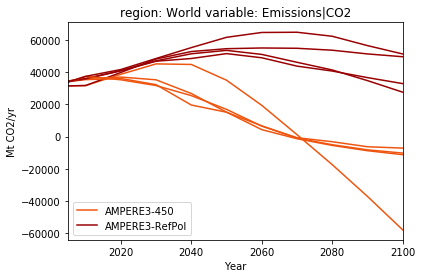

In [4]:
df.line_plot(color='scenario')